<a href="https://colab.research.google.com/github/dbwls0087/Coral_Bleaching/blob/main/code/Bleaching_new_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.5571

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.35      0.37        26
           1       0.64      0.68      0.66        44

    accuracy                           0.56        70
   macro avg       0.51      0.51      0.51        70
weighted avg       0.55      0.56      0.55        70

Confusion Matrix:
 [[ 9 17]
 [14 30]]
SST_Change        0.436509
Longitude         0.166793
DHW               0.133480
pH Level          0.115208
Latitude          0.112559
DHW_Rolling12     0.035452
Month             0.000000
DHW_Cumulative    0.000000
dtype: float64


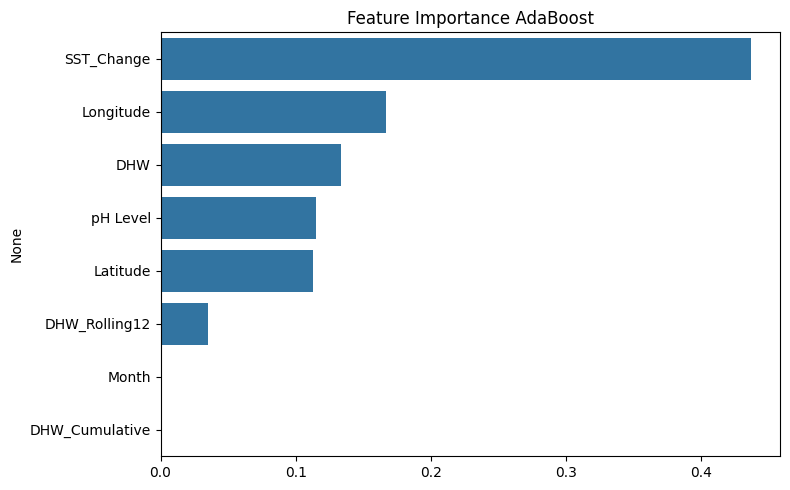

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# 1. data reading
df = pd.read_excel('/content/total dataset.xlsx')

# 2. remove NaN & binary classification targeting
df_model = df.dropna(subset=["Bleaching Severity"]).copy()

le = LabelEncoder()
df_model["Bleaching Severity"] = le.fit_transform(df_model["Bleaching Severity"].astype(str))

# High = 1, Others = 0
high_label = le.transform(["High", "Medium"])
df_model["Bleaching_Binary"] = df_model["Bleaching Severity"].apply(lambda x: 1 if x in high_label else 0)


# 3. Input & output variables
features = ['Latitude', 'Longitude', 'pH Level', 'Month',
             'DHW', 'DHW_Rolling12','DHW_Cumulative', 'SST_Change']
X = df_model[features]
y = df_model["Bleaching_Binary"]

# 4.Data division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Ada Boost ML
base = DecisionTreeClassifier(max_depth=2, class_weight = 'balanced')
model = AdaBoostClassifier(estimator = base, n_estimators=200, random_state=42)

model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)


# 6. probability precision & Threshold adjust
y_proba = model.predict_proba(X_test)[:, 1]  # High(1) 클래스에 대한 확률
threshold = 0.5
y_pred_thresh = (y_proba >= threshold).astype(int)


# 7. Evaluation
acc = accuracy_score(y_test, y_pred_thresh)
report = classification_report(y_test, y_pred_thresh)
conf = confusion_matrix(y_test, y_pred_thresh)

print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf)

# 8. Feature Importance visualization
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(importances)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance AdaBoost')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

# Search across [0, 1] threshold range in 1000 steps
search_range = np.linspace(0.0, 1.0, 1000)

# Condition settings
negative_total = sum(y_test == 0)

## At least 35% of negative samples must be correctly predicted
tn_min = int(negative_total * 0.35)
precision_min = 0.5
best_f1 = 0
best_threshold = 0.5

# Begin threshold search
for t in search_range:
    y_pred = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)

    if tn >= tn_min and precision >= precision_min:
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t


# Final application and output
y_pred_best = (y_proba >= best_threshold).astype(int)

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best, zero_division=0)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"\nOptimal Threshold for F1: {best_threshold:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))



Optimal Threshold for F1: 0.4334
Accuracy:  0.5714
Precision: 0.6458
Recall:    0.7045
F1 Score:  0.6739

Confusion Matrix:
 [[ 9 17]
 [13 31]]


Accuracy (Threshold=0.4695): 0.5571

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42        26
           1       0.65      0.64      0.64        44

    accuracy                           0.56        70
   macro avg       0.53      0.53      0.53        70
weighted avg       0.56      0.56      0.56        70

Confusion Matrix:
 [[11 15]
 [16 28]]
Latitude          0.304479
pH Level          0.219416
Longitude         0.209447
DHW_Cumulative    0.095039
SST_Change        0.085736
DHW_Rolling12     0.060607
Month             0.017422
DHW               0.007853
dtype: float64


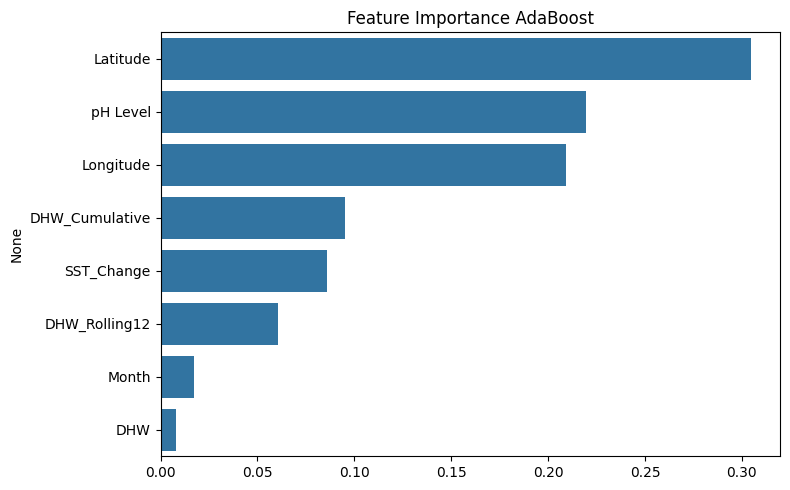

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. data reading
df = pd.read_excel('/content/total dataset.xlsx')


# 2. remove NaN & binary classification targeting
df_model = df.dropna(subset=["Bleaching Severity"]).copy()

le = LabelEncoder()
df_model["Bleaching Severity"] = le.fit_transform(df_model["Bleaching Severity"].astype(str))

high_label = le.transform(["High", "Medium"])
df_model["Bleaching_Binary"] = df_model["Bleaching Severity"].apply(lambda x: 1 if x in high_label else 0)


# 3. Input & output variables
features = ['Latitude', 'Longitude', 'pH Level', 'Month',
             'DHW', 'DHW_Rolling12','DHW_Cumulative', 'SST_Change']
X = df_model[features]
y = df_model["Bleaching_Binary"]

# 4.Data division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#5. UnderSampling
df_train = X_train.copy()
df_train['target'] = y_train

min_class_size = df_train['target'].value_counts().min()

df_under = df_train.groupby('target').sample(n=min_class_size, random_state=42)

X_under = df_under.drop(columns='target')
y_under = df_under['target']

#6. Adaboost ML
base = DecisionTreeClassifier(max_depth=2, random_state=42, class_weight = 'balanced')
model_under = AdaBoostClassifier(estimator=base, n_estimators=50, random_state=42)
model_under.fit(X_under, y_under)

y_pred_under = model_under.predict(X_test)
y_proba_under = model_under.predict_proba(X_test)[:, 1]
acc_under = accuracy_score(y_test, y_pred_under)


# 7.probability precision & Threshold adjust
threshold = 0.4695
y_pred_thresh_under = (y_proba_under >= threshold).astype(int)


# 8. Evaluation
acc = accuracy_score(y_test, y_pred_thresh_under)
report = classification_report(y_test, y_pred_thresh_under)
conf = confusion_matrix(y_test, y_pred_thresh_under)

print(f"Accuracy (Threshold={threshold}): {acc:.4f}\n")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf)


# 8. Feature Importance 시각화
importances = pd.Series(model_under.feature_importances_, index=features).sort_values(ascending=False)
print(importances)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance AdaBoost')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

# Search across [0, 1] threshold range in 1000 steps
search_range = np.linspace(0.0, 1.0, 1000)

# Condition settings
negative_total = sum(y_test == 0)

# At least 35% of negative samples must be correctly predicted
tn_min = int(negative_total * 0.35)
precision_min = 0.5
best_f1 = 0
best_threshold = 0.5

# Begin threshold search
for t in search_range:
    y_pred = (y_proba_under >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)

    if tn >= tn_min and precision >= precision_min:
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t


# Final application and output
y_pred_best = (y_proba_under >= best_threshold).astype(int)

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best, zero_division=0)
f1 = f1_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)

print(f"\nOptimal Threshold for F1: {best_threshold:.4f}")
print(f"\nAccuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {best_f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))



Optimal Threshold for F1: 0.4835

Accuracy:  0.5714
Precision: 0.6667
Recall:    0.6364
F1 Score:  0.6512

Confusion Matrix:
 [[12 14]
 [16 28]]
